In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

# Showing the Images and Labels

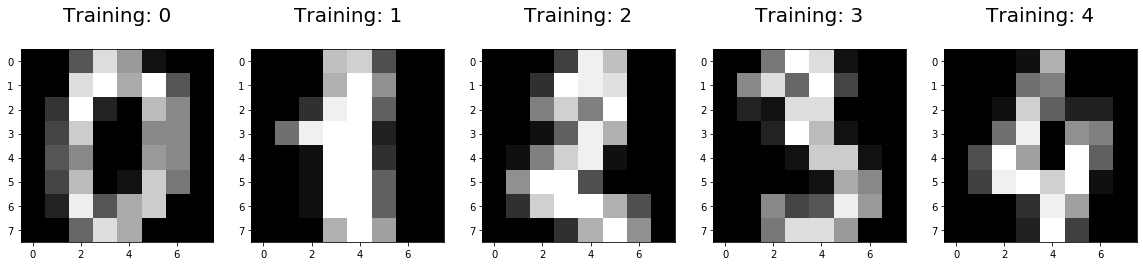

In [5]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n ' % label, fontsize = 20)

# Split into training and test sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size = 0.25, random_state = 0)

# Scikit-learn 4 Step Modelling Pattern
 Step 1: Import the model you want to use (implemented as a class)


In [7]:
from sklearn.linear_model import LogisticRegression

Step 2: Make an instance of the model:

In [8]:
regressor = LogisticRegression()

In [9]:
regressor

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Step 3: Training the model on the data and storing the info learned from the data:

In [10]:
regressor.fit(x_train, y_train)

/home/ryan/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Step 4: Predict labels of new data

In [11]:
regressor.predict(x_test[0].reshape(1,-1))

array([2])

In [12]:
y_pred = regressor.predict(x_test)

In [13]:
y_pred.shape

(450,)

# Measuring Model Performance

Accuracy: fraction of correct predictions

In [14]:
# Use score method
score = regressor.score(x_test, y_test)
score

0.9511111111111111

# Confusion Matrix
Is a table that describes the model performance of a classification problem on a set of test data for which the true values are known.

In [18]:
def plot_confusion_matrix(cm, title = 'Confusion Matrix', cmap= 'Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.tight_layout()
    plt.ylabel('Actual Label', size = 15)
    plt.xlabel('Predicted Label', size = 15)
    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment = 'center', verticalalignment = 'center')
    

In [19]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion



array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

<Figure size 432x288 with 0 Axes>

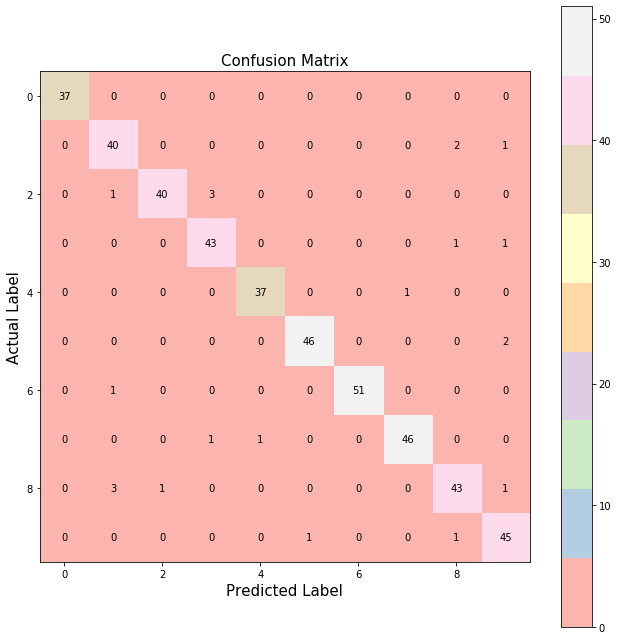

In [20]:
plt.figure()
plot_confusion_matrix(confusion)

# Display Misclassified images with predicted labels

In [29]:
index =  0
misclassifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict != actual:
        misclassifiedIndex.append(index)
        index+=1

In [37]:
len(misclassifiedIndex)
misclassifiedIndex

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

IndexError: tuple index out of range

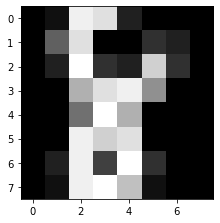

In [36]:
plt.figure(figsize = (20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[1:10]):
    plt.subplot(1, 5, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrong]), fontsize = 20)

#### 